# Decompose the Ask

**Task:** Collect and analyze weather data across cities worldwide.

 **Purpose:** Use the data to recommend ideal hotels based on clients’ weather and latitude/longitude preferences.

# Identify the Data Sources

# Data Retrieval


In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [4]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2b396ffd8037184849afd69cd267c0d1


In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
print(coordinates)

[(-14.26879080090697, -144.22420736332765), (-8.682279125913027, 119.8519666386963), (-37.72699826495698, -82.59681574189266), (-76.70565531096163, -38.61571464112561), (-23.12016801747903, 135.54848980535377), (-21.664640048957153, 127.21556213767178), (85.08366432393592, -153.19083852422847), (-21.499578827547793, -64.76437669073594), (-47.387288746464606, 54.991150737262615), (27.45223195304176, 160.25225867587318), (-54.04184744976346, -163.5679132208887), (-85.9400323763603, -70.27444323589798), (-85.4974382121789, 95.77227191166469), (-5.8313099962597335, 33.09148524477888), (-79.04616361481348, 163.59331405939054), (22.929989377300558, 145.64742964211013), (-20.485755826966184, -160.72722013411925), (32.76352754478903, 93.73293076677425), (6.51218612956599, 173.7125675793577), (-87.34107626730096, 138.00537808203978), (-61.92727537484345, -63.32431989143376), (-13.65236578764187, 67.59682179784173), (-78.43604752544655, -115.19685653759925), (-11.032707836965628, 117.47546879114

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

610

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tautira
Processing Record 2 of Set 1 | ruteng
Processing Record 3 of Set 1 | lebu
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | alice springs
Processing Record 6 of Set 1 | yulara
Processing Record 7 of Set 1 | barrow
Processing Record 8 of Set 1 | tarija
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | hasaki
Processing Record 11 of Set 1 | avarua
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | sikonge
Processing Record 14 of Set 1 | bluff
Processing Record 15 of Set 1 | katsuura
Processing Record 16 of Set 1 | lasa
Processing Record 17 of Set 1 | butaritari
Processing Record 18 of Set 1 | hobart
Processing Record 19 of Set 1 | grand gaube
Processing Record 20 of Set 1 | punta arenas
Processing Record 21 of Set 1 | sumbawa
City not found. Skipping...
Processing Record 22 of Set 1 | ludvika
Processi

Processing Record 39 of Set 4 | faanui
Processing Record 40 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 41 of Set 4 | hlotse
Processing Record 42 of Set 4 | beringovskiy
Processing Record 43 of Set 4 | mitchell
Processing Record 44 of Set 4 | marsh harbour
Processing Record 45 of Set 4 | pacific grove
Processing Record 46 of Set 4 | namatanai
Processing Record 47 of Set 4 | kavaratti
Processing Record 48 of Set 4 | bandarbeyla
Processing Record 49 of Set 4 | norman wells
Processing Record 50 of Set 4 | makakilo city
Processing Record 1 of Set 5 | dhidhdhoo
Processing Record 2 of Set 5 | chokurdakh
Processing Record 3 of Set 5 | vaini
Processing Record 4 of Set 5 | tazovskiy
Processing Record 5 of Set 5 | chimbarongo
Processing Record 6 of Set 5 | gossaigaon
Processing Record 7 of Set 5 | fairbanks
Processing Record 8 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 9 of Set 5 | puerto baquerizo moreno
Processing Record 10 of Set 5 | whyal

Processing Record 28 of Set 8 | ures
Processing Record 29 of Set 8 | calvinia
Processing Record 30 of Set 8 | kalmunai
Processing Record 31 of Set 8 | marsa matruh
Processing Record 32 of Set 8 | virovitica
Processing Record 33 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 34 of Set 8 | kangaatsiaq
Processing Record 35 of Set 8 | repnoye
Processing Record 36 of Set 8 | odienne
Processing Record 37 of Set 8 | petatlan
Processing Record 38 of Set 8 | herat
Processing Record 39 of Set 8 | hay river
Processing Record 40 of Set 8 | vardo
Processing Record 41 of Set 8 | biak
Processing Record 42 of Set 8 | abay
Processing Record 43 of Set 8 | stornoway
Processing Record 44 of Set 8 | puerto escondido
Processing Record 45 of Set 8 | bilma
Processing Record 46 of Set 8 | talnakh
Processing Record 47 of Set 8 | nikolskoye
Processing Record 48 of Set 8 | nerchinskiy zavod
Processing Record 49 of Set 8 | manaure
Processing Record 50 of Set 8 | kekri
Processing Record 1 of S

Processing Record 17 of Set 12 | kongolo
Processing Record 18 of Set 12 | kjollefjord
Processing Record 19 of Set 12 | rungata
City not found. Skipping...
Processing Record 20 of Set 12 | horodnytsya
Processing Record 21 of Set 12 | juneau
Processing Record 22 of Set 12 | lensk
Processing Record 23 of Set 12 | faya
Processing Record 24 of Set 12 | katherine
Processing Record 25 of Set 12 | coffs harbour
Processing Record 26 of Set 12 | arawa
Processing Record 27 of Set 12 | rapar
Processing Record 28 of Set 12 | saint-joseph
Processing Record 29 of Set 12 | gao
Processing Record 30 of Set 12 | havelock
Processing Record 31 of Set 12 | mocambique
City not found. Skipping...
Processing Record 32 of Set 12 | vanimo
Processing Record 33 of Set 12 | la primavera
Processing Record 34 of Set 12 | ancud
Processing Record 35 of Set 12 | williamsport
Processing Record 36 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 37 of Set 12 | pinotepa de don luis
Processing Record 38 

In [10]:
len(city_data)

564

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Tautira,-17.73,-149.15,77.00,78,75,3.36,PF,2020-02-19 17:20:15
1,Ruteng,-8.61,120.47,69.35,98,86,2.84,ID,2020-02-19 17:20:15
2,Lebu,-37.62,-73.65,66.76,37,0,14.27,CL,2020-02-19 17:18:27
3,Ushuaia,-54.80,-68.30,50.00,81,75,31.09,AR,2020-02-19 17:17:54
4,Alice Springs,-23.70,133.88,71.60,21,0,5.82,AU,2020-02-19 17:20:11
5,Yulara,-25.24,130.99,78.80,19,62,8.05,AU,2020-02-19 17:19:40
6,Barrow,71.29,-156.79,-5.80,76,90,5.82,US,2020-02-19 17:18:00
7,Tarija,-21.54,-64.73,71.64,67,29,6.26,BO,2020-02-19 17:20:17
8,Hasaki,35.73,140.83,41.00,80,75,2.24,JP,2020-02-19 17:18:39
9,Avarua,-21.21,-159.78,80.60,88,100,10.29,CK,2020-02-19 17:17:19


In [12]:
# Reordering the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Tautira,PF,2020-02-19 17:20:15,-17.73,-149.15,77.00,78,75,3.36
1,Ruteng,ID,2020-02-19 17:20:15,-8.61,120.47,69.35,98,86,2.84
2,Lebu,CL,2020-02-19 17:18:27,-37.62,-73.65,66.76,37,0,14.27
3,Ushuaia,AR,2020-02-19 17:17:54,-54.80,-68.30,50.00,81,75,31.09
4,Alice Springs,AU,2020-02-19 17:20:11,-23.70,133.88,71.60,21,0,5.82
5,Yulara,AU,2020-02-19 17:19:40,-25.24,130.99,78.80,19,62,8.05
6,Barrow,US,2020-02-19 17:18:00,71.29,-156.79,-5.80,76,90,5.82
7,Tarija,BO,2020-02-19 17:20:17,-21.54,-64.73,71.64,67,29,6.26
8,Hasaki,JP,2020-02-19 17:18:39,35.73,140.83,41.00,80,75,2.24
9,Avarua,CK,2020-02-19 17:17:19,-21.21,-159.78,80.60,88,100,10.29


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Assemble and Clean


In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1582133011.602035

# Analyze for Trends


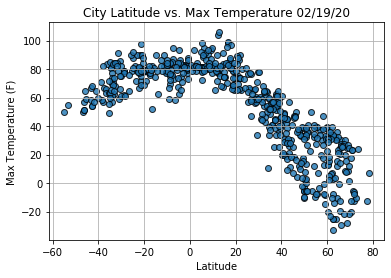

In [19]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

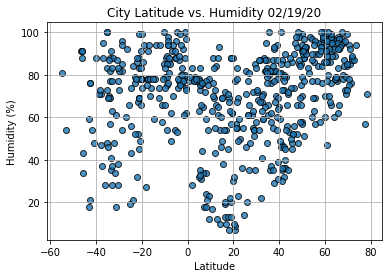

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

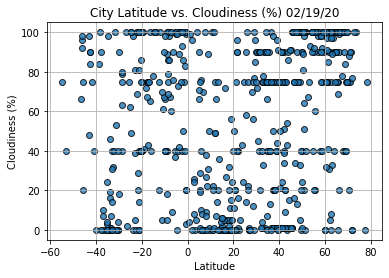

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

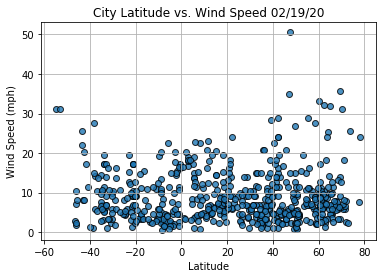

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()